In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
clean_df = df.drop(columns = 'MYOPIC')
clean_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
clean_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_df[['AL','VCD','TVHR','DIOPTERHR', 'SPORTHR','READHR']])

In [6]:
scaled_df = pd.DataFrame(scaled_data, columns = ['AL','VCD','TVHR','DIOPTERHR','SPORTHR','READHR'])
scaled_df.head()

,AL,VCD,TVHR,DIOPTERHR,SPORTHR,READHR
0,-0.892861,-1.019792,0.184058,0.498304,4.150661,1.697450
1,-0.171840,-0.130763,-0.340932,-0.875088,-0.998898,-0.912062
2,-0.009977,0.215809,0.184058,-0.750234,0.257092,-0.912062
3,-0.436703,-0.974587,-0.865922,0.685585,0.759488,2.676017
4,1.167204,1.180178,-0.865922,-1.374503,0.257092,-0.912062


In [7]:
scaled_df[['AGE', 'SPHEQ', 'ACD', 'LT', 'COMPHR',
       'STUDYHR', 'MOMMY', 'DADMY']] = clean_df[['AGE', 'SPHEQ', 'ACD', 'LT','COMPHR',
       'STUDYHR', 'MOMMY', 'DADMY']]
scaled_df.head()

,AL,VCD,TVHR,DIOPTERHR,SPORTHR,READHR,AGE,SPHEQ,ACD,LT,COMPHR,STUDYHR,MOMMY,DADMY
0,-0.892861,-1.019792,0.184058,0.498304,4.150661,1.697450,6,-0.052,3.690,3.498,0,0,1,1
1,-0.171840,-0.130763,-0.340932,-0.875088,-0.998898,-0.912062,6,0.608,3.702,3.392,1,1,1,1
2,-0.009977,0.215809,0.184058,-0.750234,0.257092,-0.912062,6,1.179,3.462,3.514,2,0,0,0
3,-0.436703,-0.974587,-0.865922,0.685585,0.759488,2.676017,6,0.525,3.862,3.612,0,0,0,1
4,1.167204,1.180178,-0.865922,-1.374503,0.257092,-0.912062,5,0.697,3.676,3.454,0,0,1,0


In [8]:
pca = PCA(n_components=0.9)
myopic_pca = pca.fit_transform(scaled_df)

In [9]:
myopic_pca

array([[-2.13960868, -0.19972104,  0.37486492,  3.72618069, -0.33398963,
        -3.0856775 ],
       [-1.42407412, -0.62643411,  0.23543932, -1.19296322, -0.1160484 ,
         0.58299678],
       [-0.61408325, -1.64142718, -0.30730718, -0.22290958, -0.77602892,
        -0.222819  ],
       ...,
       [-2.66236154, -1.27662395, -0.91725705, -1.34010633,  0.09884866,
        -0.18051621],
       [-1.45186064, -1.23223547,  0.97615113,  1.03157527, -0.77895711,
         0.57104298],
       [-0.6072077 , -1.59010242, -0.05710875,  0.42220594, -1.31204238,
        -1.29432977]])

In [10]:
df_myopic_pca = pd.DataFrame(
    data=myopic_pca, columns=["principal component 1", "principal component 2", 
                              "principal component 3", "principal component 4",
                              "principal component 5", "principal component 6"]
)
df_myopic_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-2.139609,-0.199721,0.374865,3.726181,-0.333990,-3.085678
1,-1.424074,-0.626434,0.235439,-1.192963,-0.116048,0.582997
2,-0.614083,-1.641427,-0.307307,-0.222910,-0.776029,-0.222819
3,-2.164506,-0.243111,0.723433,2.334059,2.256770,-1.010204
4,-2.637340,-1.271521,-1.720884,-1.054801,-0.054578,-0.736138


In [11]:
pca.explained_variance_ratio_

array([0.45532469, 0.24287175, 0.09177394, 0.06249693, 0.04552687,
       0.0391452 ])

In [12]:
tsne = TSNE(learning_rate=250, init = 'pca')
tsne_features = tsne.fit_transform(df_myopic_pca)

C:\Users\Patrick\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [13]:
tsne_features.shape

(618, 2)

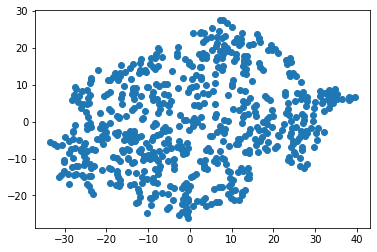

In [14]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [15]:
df_tsne = pd.DataFrame(tsne_features, columns = ['Feature 1', 'Feature 2'])
df_tsne.head()

,Feature 1,Feature 2
0,-23.583071,11.714433
1,-14.384419,-2.517719
2,0.211797,-15.054643
3,-25.818422,8.328304
4,-6.765996,-9.400178


In [16]:
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(df_tsne)
    inertia.append(km.inertia_)

elbow = {'k':k,'inertia':inertia}
df_elbow = pd.DataFrame(elbow)
df_elbow.head()

,k,inertia
0,1,278985.656250
1,2,137722.875000
2,3,97701.437500
3,4,66037.835938
4,5,50842.851562


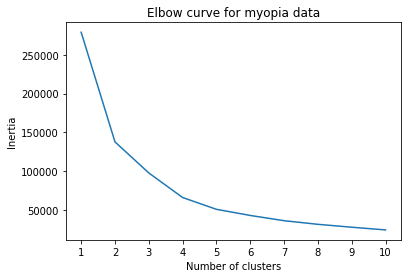

In [17]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

In [18]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Train the model
model.fit(tsne_features)

# Predict clusters
predictions = model.predict(tsne_features)

df_tsne["class"] = model.labels_

df_tsne

,Feature 1,Feature 2,class
0,-23.583071,11.714433,0
1,-14.384419,-2.517719,0
2,0.211797,-15.054643,1
3,-25.818422,8.328304,0
4,-6.765996,-9.400178,1
...,...,...,...
613,28.089287,5.588615,3
614,-13.898141,-11.097621,0
615,-8.702743,-9.310574,1
616,-9.604148,-20.762594,1


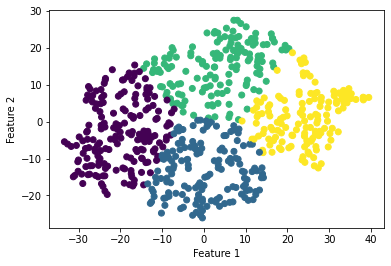

In [19]:
plt.scatter(df_tsne['Feature 1'], df_tsne['Feature 2'], c=df_tsne['class'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The model seems to clearly identify 4 clusters roughly associated with the 'cardinal' directions of the data. There seems to be a solid consistency to the model, but without the coloring it is visually difficult to distinguish the clusters from one another.